In [ ]:
from google.colab import drive
drive.mount ("/content/drive")

Mounted at /content/drive


# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as ss
from plotly.offline import iplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import plotly.express as px

# **Data Loading and Exploration**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/bank.csv')
data.describe()

age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  
max      854.000000     58.000000

In [ ]:
data.info

<bound method DataFrame.info of        age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campa

In [ ]:
data.shape

(11162, 17)

In [ ]:
data.head(5)

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

In [ ]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

# **Data Cleaning**

In [ ]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
data.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.drop_duplicates(inplace=True)

# **Feature Engineering**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [ ]:
data['deposit'] = data['deposit'].map({'no': 0, 'yes': 1})

In [ ]:
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan']

for col in cat_cols:
    data[col] = data[col].astype('category')

data.dtypes

age           float64
job          category
marital      category
education    category
default      category
balance       float64
housing      category
loan         category
contact        object
day           float64
month          object
duration      float64
campaign      float64
pdays         float64
previous      float64
poutcome       object
deposit         int64
dtype: object

In [ ]:
for col in cat_cols:
    print(f'{col}:')
    print(data[col].unique())
    print('\n')

job:
['admin.', 'technician', 'services', 'management', 'retired', ..., 'entrepreneur', 'housemaid', 'unknown', 'self-employed', 'student']
Length: 12
Categories (12, object): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'student',
                          'technician', 'unemployed', 'unknown']


marital:
['married', 'single', 'divorced']
Categories (3, object): ['divorced', 'married', 'single']


education:
['secondary', 'tertiary', 'primary', 'unknown']
Categories (4, object): ['primary', 'secondary', 'tertiary', 'unknown']


default:
['no', 'yes']
Categories (2, object): ['no', 'yes']


housing:
['yes', 'no']
Categories (2, object): ['no', 'yes']


loan:
['no', 'yes']
Categories (2, object): ['no', 'yes']




In [ ]:
data.job = data.job.str.replace(".", "")

<ipython-input-23-c2e15fe4088f>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.job = data.job.str.replace(".", "")


In [ ]:
age_job=pd.pivot_table(data, values='age', index='job', aggfunc='mean')
print(age_job)

                    age
job                    
admin          0.277585
blue-collar    0.279288
entrepreneur   0.323210
housemaid      0.382406
management     0.288549
retired        0.615898
self-employed  0.283245
services       0.261583
student        0.105231
technician     0.272749
unemployed     0.298665
unknown        0.374768


# **Data Visualization**

<ipython-input-124-76fffaee5663>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



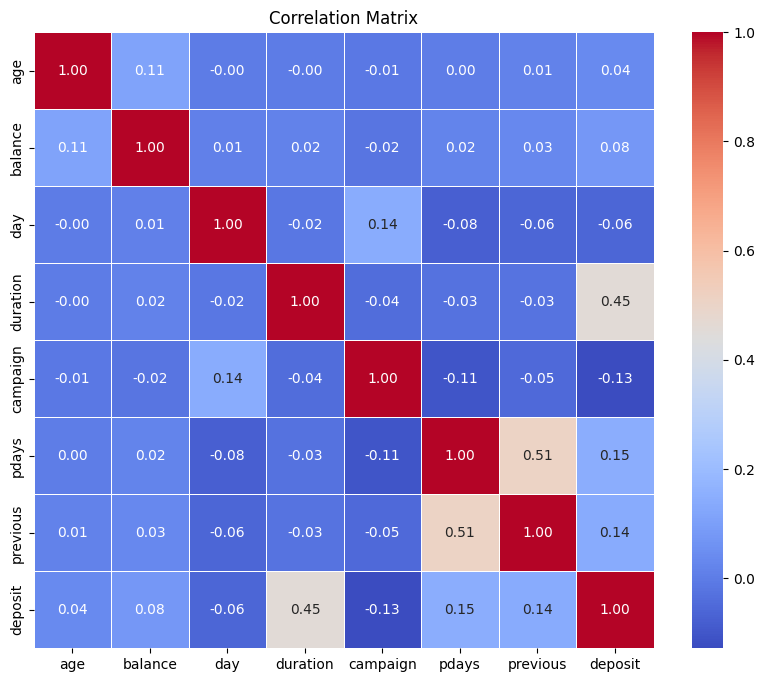

In [ ]:
bank_data_corr = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(bank_data_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

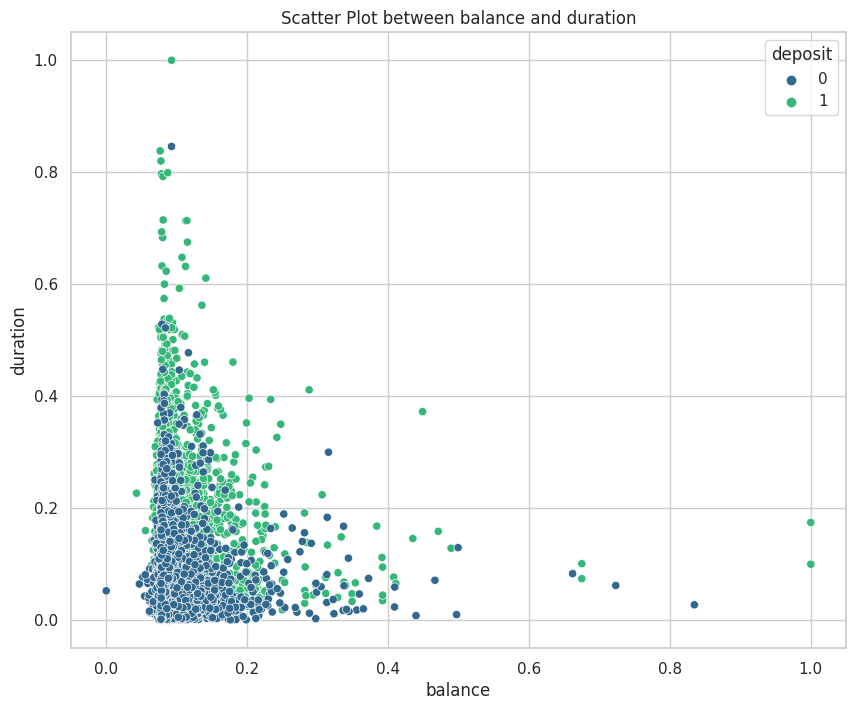

In [ ]:
sns.set(style="whitegrid")
x_column = 'balance'
y_column = 'duration'
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x=x_column, y=y_column, hue='deposit', palette='viridis')
plt.title(f'Scatter Plot between {x_column} and {y_column}')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.show()

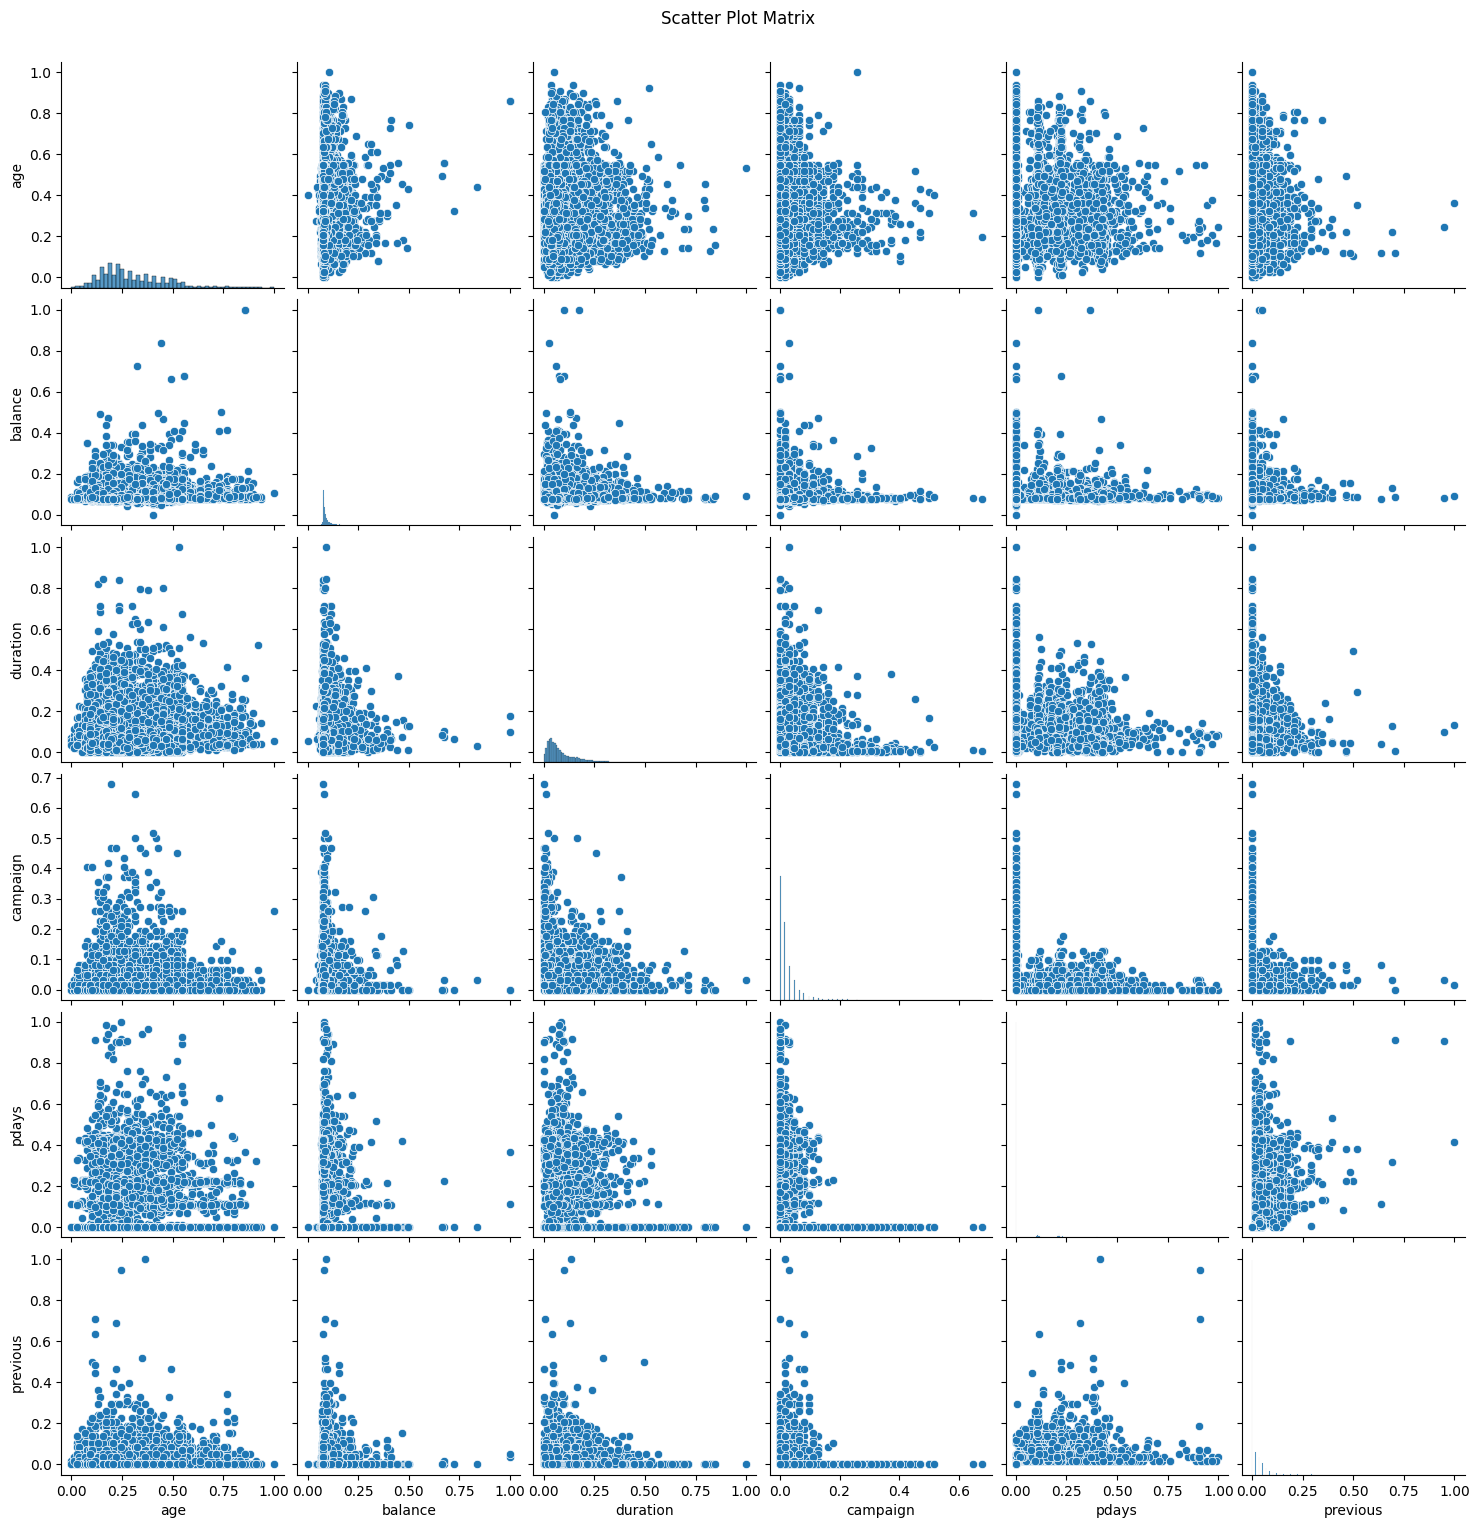

In [ ]:
columns_for_scatter = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
scatter_matrix_data = data[columns_for_scatter]

sns.pairplot(scatter_matrix_data)
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()

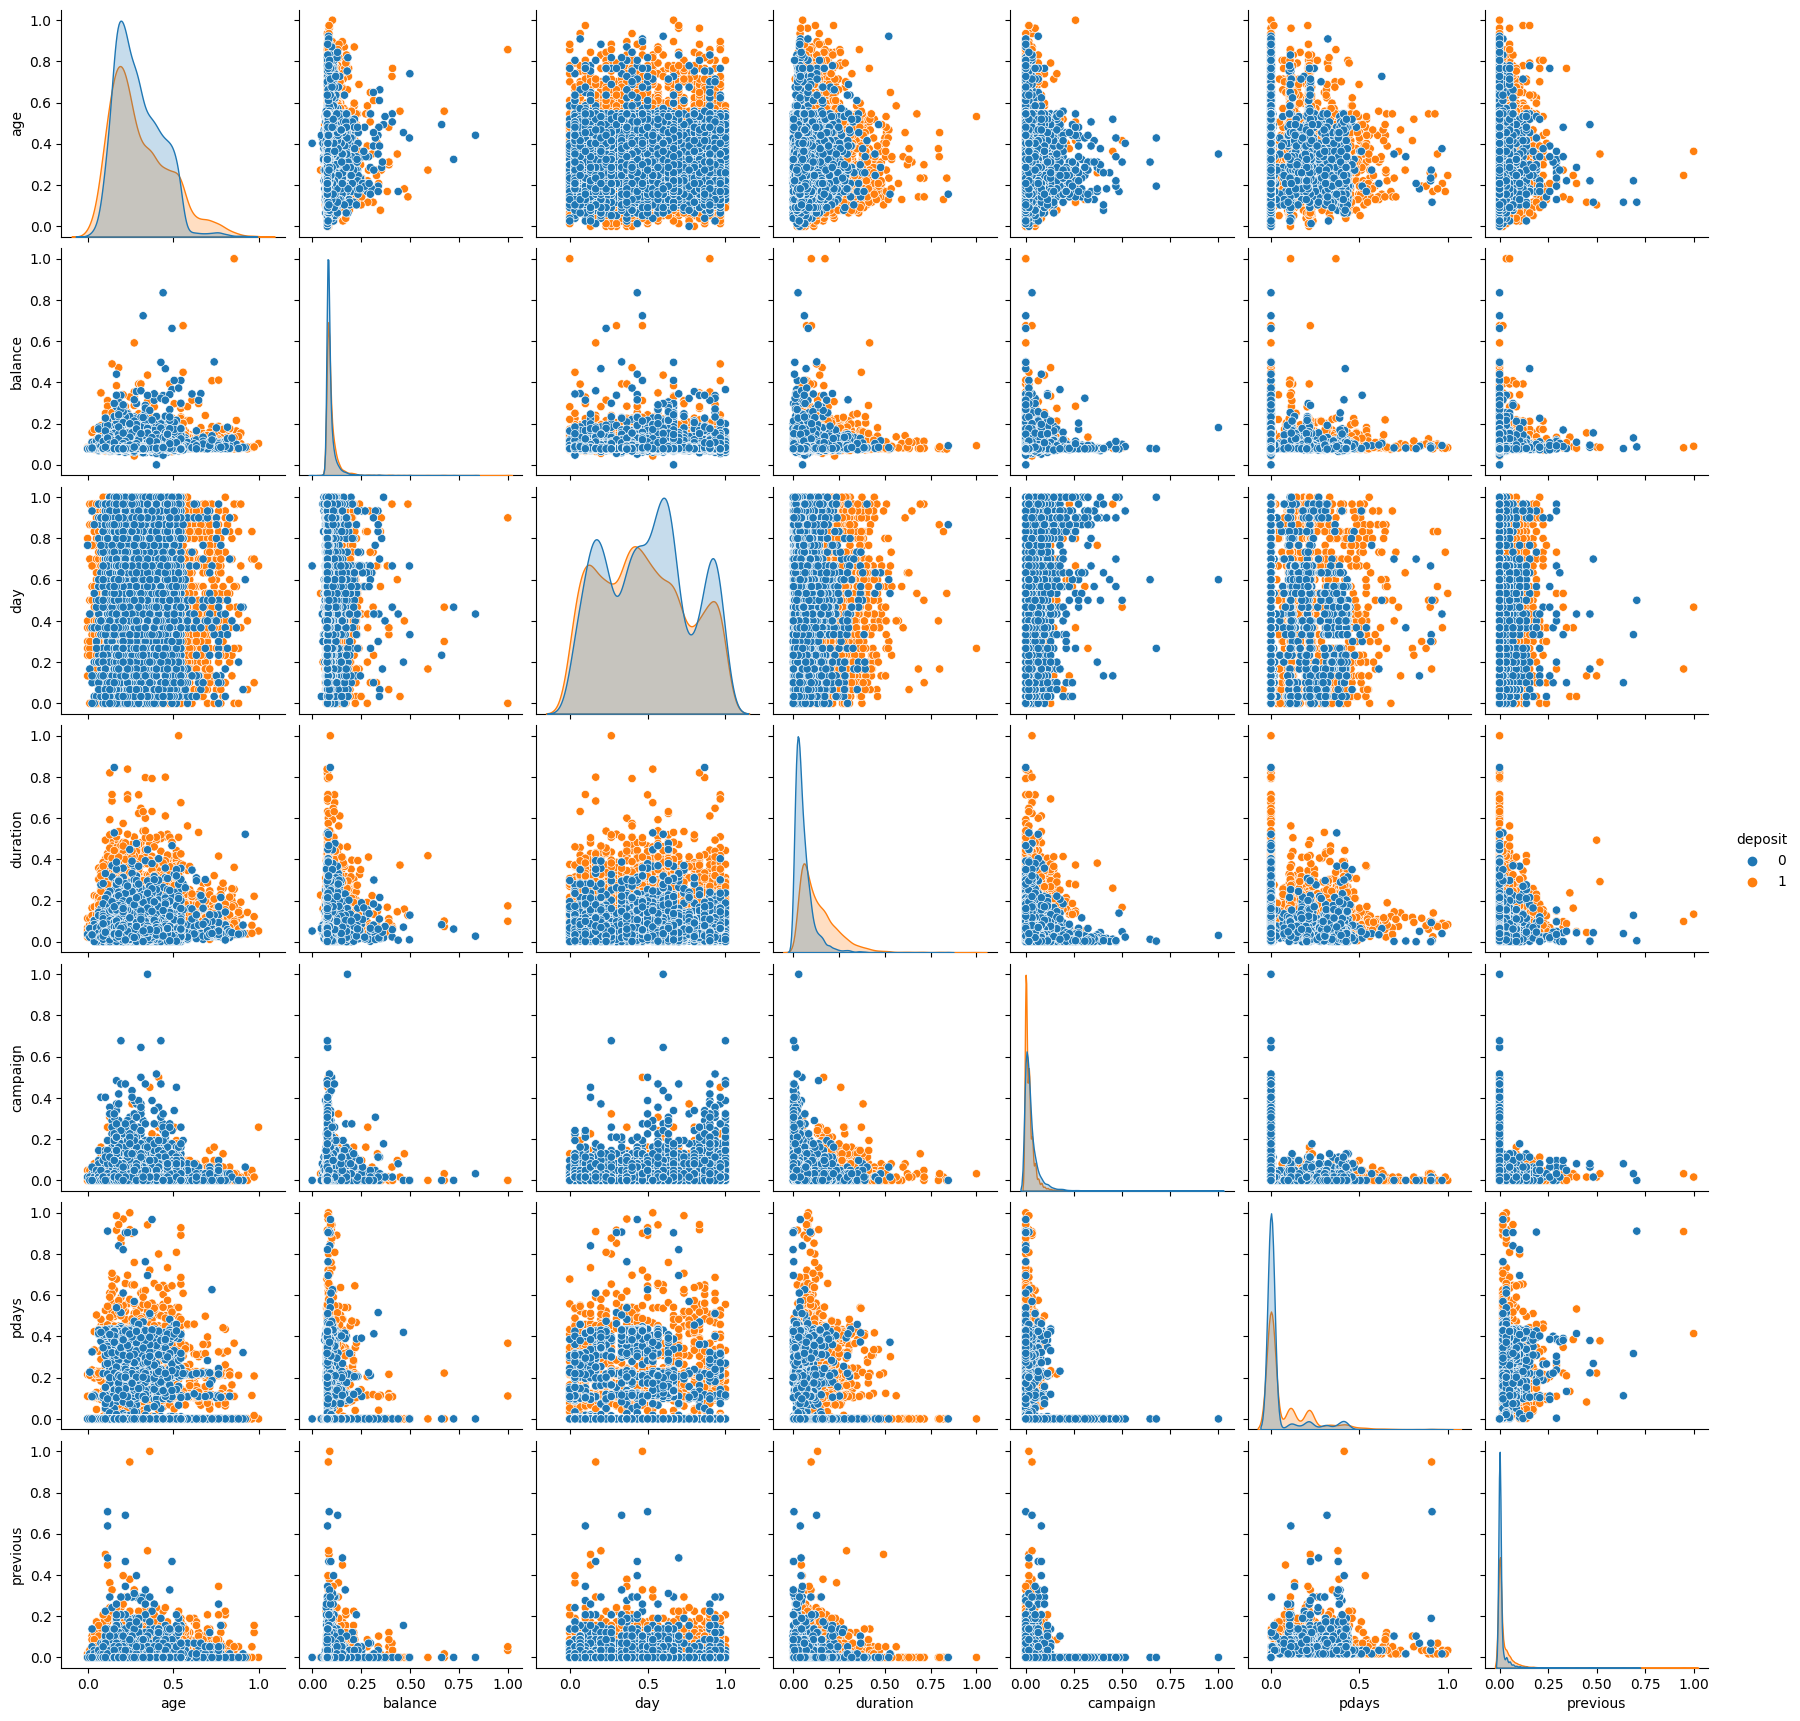

In [ ]:
sns.pairplot(data, hue='deposit')

In [ ]:
fig = px.histogram(data["age"],
                   nbins=20,
                   color_discrete_sequence=["#FFA07A"],
                   labels = {"value" :"Ages", "count" : "Frequency"},
                   title="The Distribution of Ages",text_auto=True)

fig.update_layout(showlegend = False,title = {"font": {"size": 26,"family": "tahoma",}})
fig.update_traces(textfont= {"family": "consolas","size": 14}, hovertemplate = "Age Range: %{x}<br>Frequency: %{y}",marker = {"line": {"color": "#333", "width":1}} )

iplot(fig)

<Figure size 1200x800 with 0 Axes>

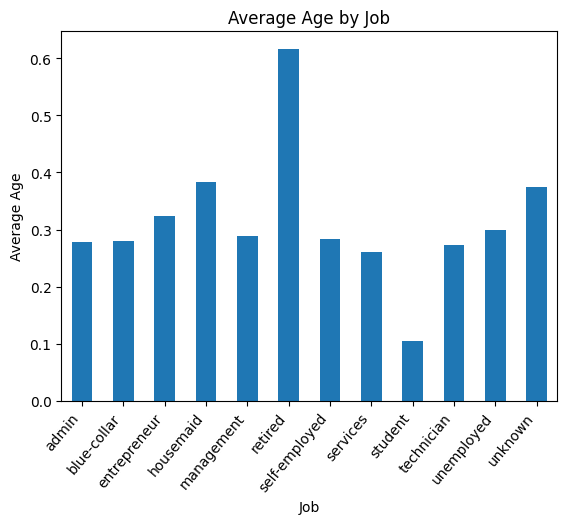

In [ ]:
plt.figure(figsize=(12,8))
age_job.plot(kind='bar', legend=False)
plt.title('Average Age by Job')
plt.xlabel('Job')
plt.ylabel('Average Age')
plt.xticks(rotation=50, ha='right')
plt.show()

In [ ]:
pd.crosstab(data.job,columns=data.education,values=data.age,aggfunc='mean').round(0)

education      primary  secondary  tertiary  unknown
job                                                 
admin              0.0        0.0       0.0      0.0
blue-collar        0.0        0.0       0.0      0.0
entrepreneur       0.0        0.0       0.0      0.0
housemaid          0.0        0.0       0.0      0.0
management         0.0        0.0       0.0      0.0
retired            1.0        1.0       1.0      1.0
self-employed      0.0        0.0       0.0      0.0
services           0.0        0.0       0.0      0.0
student            0.0        0.0       0.0      0.0
technician         0.0        0.0       0.0      0.0
unemployed         0.0        0.0       0.0      0.0
unknown            0.0        0.0       0.0      0.0

In [ ]:
data.education.value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [ ]:
data=data[data['education']!='unknown']

<Axes: xlabel='marital', ylabel='count'>

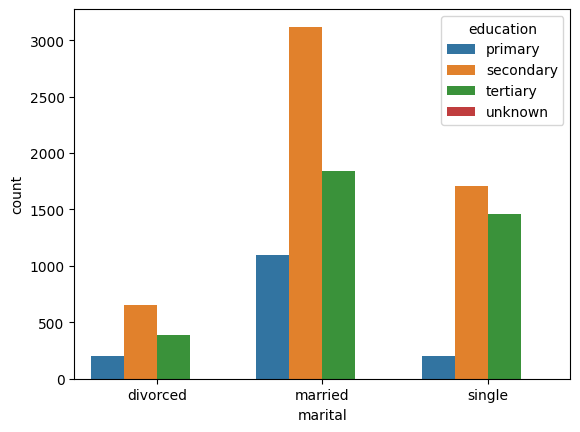

In [ ]:
sns.countplot(x='marital', hue='education',data=data)

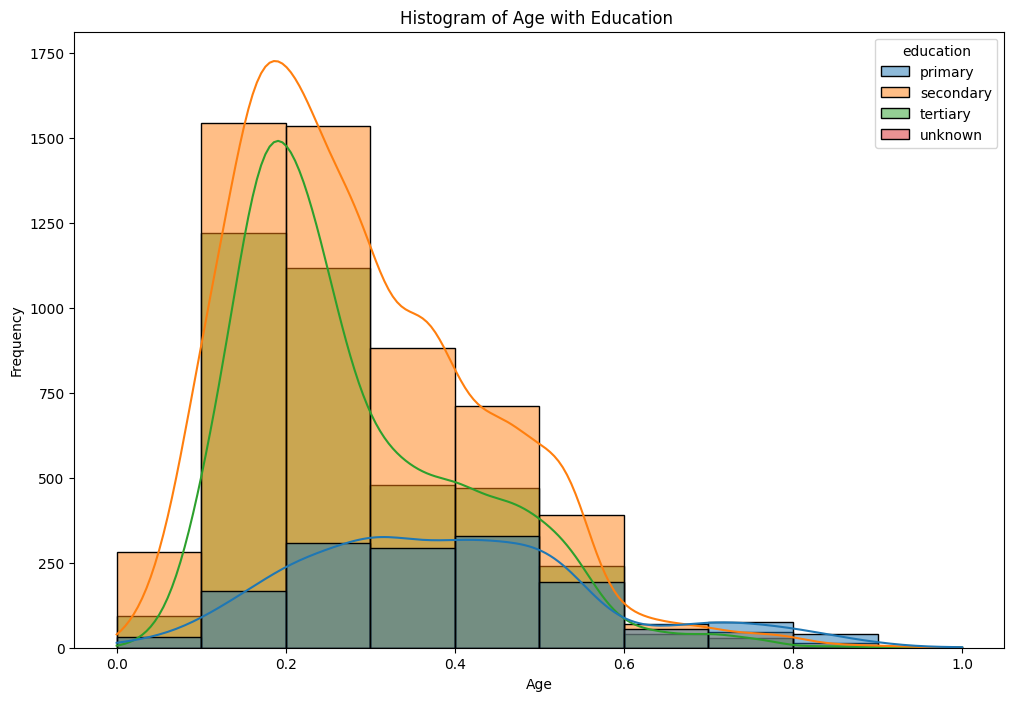

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(data=data, x=data.age, hue=data.education, bins=10,kde=True)

plt.title('Histogram of Age with Education ')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

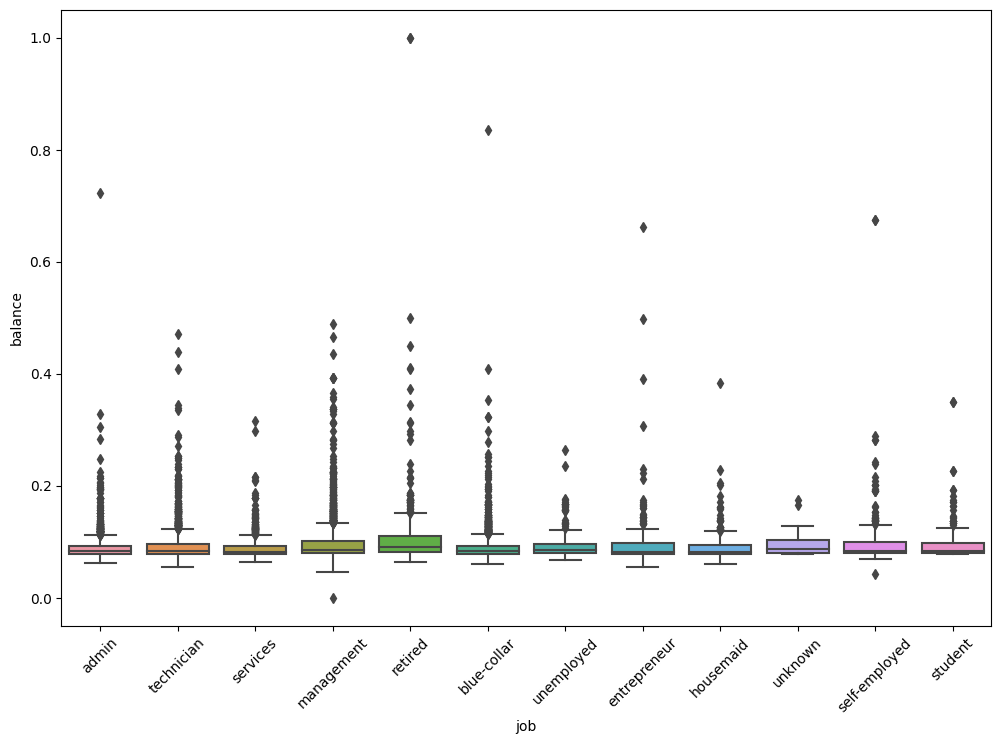

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=data,x=data.job,y=data.balance)
plt.xticks(rotation=45)
plt.show()

In [ ]:
result=pd.crosstab(index=data.marital,columns=data.job,values=data.duration,aggfunc='mean').round(2)
print(result)

job       admin  blue-collar  entrepreneur  housemaid  management  retired  \
marital                                                                      
divorced   0.10         0.12          0.09       0.09        0.10      0.1   
married    0.09         0.10          0.09       0.09        0.09      0.1   
single     0.09         0.11          0.11       0.10        0.10      0.1   

job       self-employed  services  student  technician  unemployed  unknown  
marital                                                                      
divorced           0.11      0.11     0.09        0.08        0.11      NaN  
married            0.09      0.10     0.10        0.09        0.11     0.08  
single             0.12      0.10     0.09        0.10        0.11     0.10  


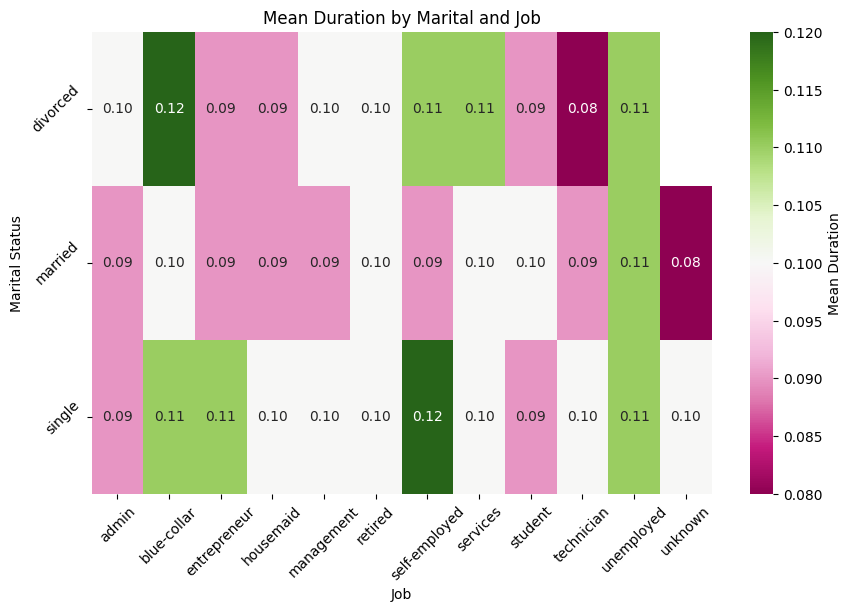

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(result, annot=True, cmap='PiYG', fmt='.2f', cbar_kws={'label': 'Mean Duration'})

plt.title('Mean Duration by Marital and Job')
plt.xlabel('Job')
plt.ylabel('Marital Status')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()

# **Train Test Split**

In [ ]:
X = data.drop('deposit', axis=1)
y = data['deposit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Data Preprocessing**

In [ ]:
numeric_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# **Model Training - Classification**

In [ ]:
classification_model = RandomForestClassifier(random_state=42)
classification_model.fit(X_train_preprocessed, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_preprocessed, y_train)

KNeighborsClassifier()

In [ ]:
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train_preprocessed, y_train)

DecisionTreeClassifier()

# **Model Evaluation**

In [ ]:
y_pred = classification_model.predict(X_test_preprocessed)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy of Random Forest Classifier:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[955 211]
 [143 924]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.82      0.84      1166
           1       0.81      0.87      0.84      1067

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233


Accuracy of Random Forest Classifier: 0.8414688759516346


In [ ]:
y_pred_knn = knn_classifier.predict(X_test_preprocessed)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("\nAccuracy of KNN Classifier:", accuracy_score(y_test, y_pred_knn))

Confusion Matrix:
 [[993 173]
 [273 794]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.85      0.82      1166
           1       0.82      0.74      0.78      1067

    accuracy                           0.80      2233
   macro avg       0.80      0.80      0.80      2233
weighted avg       0.80      0.80      0.80      2233


Accuracy of KNN Classifier: 0.800268696820421


In [ ]:
y_pred_decision_tree = decision_tree_classifier.predict(X_test_preprocessed)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_decision_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_decision_tree))
print("\nAccuracy of Decision Tree Classifier:", accuracy_score(y_test, y_pred_decision_tree))

Confusion Matrix:
 [[939 227]
 [248 819]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      1166
           1       0.78      0.77      0.78      1067

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233


Accuracy of Decision Tree Classifier: 0.787281683833408


# **K Means - Clustering**

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_train_preprocessed)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


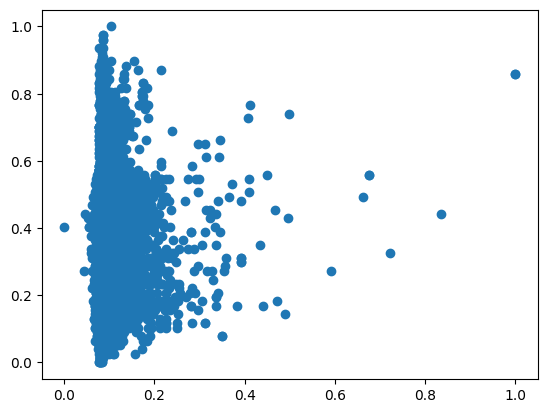

In [ ]:
plt.scatter(data['balance'], data['age'])
x_bank = data[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


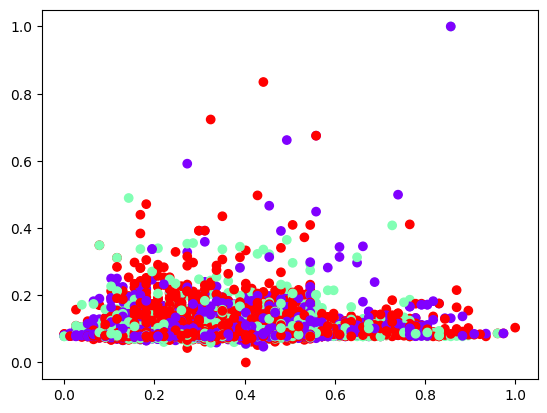

In [ ]:
kmeans_bank = KMeans(n_clusters=3)
kmeans_bank.fit(x_bank)
identify_clusters_bank = kmeans_bank.fit_predict(x_bank)
bank_data_with_clusters = data.copy()
bank_data_with_clusters['Clusters'] = identify_clusters_bank
plt.scatter(bank_data_with_clusters['age'], bank_data_with_clusters['balance'],
            c=bank_data_with_clusters['Clusters'], cmap='rainbow')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'WCSS')

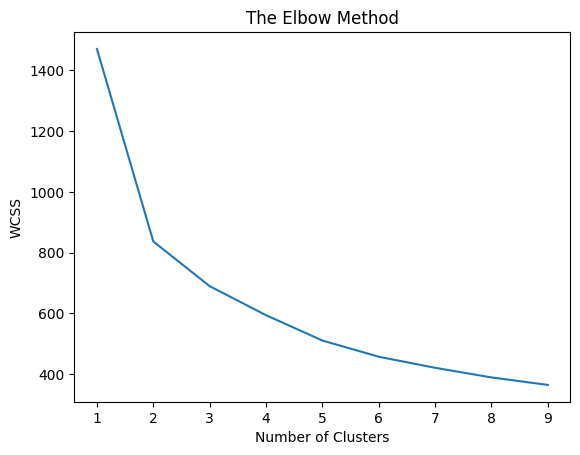

In [ ]:
wcss_bank = []
for i in range(1, 10):  # Adjust the range based on your data
    kmeans_bank = KMeans(n_clusters=i)
    kmeans_bank.fit(x_bank)
    wcss_iter_bank = kmeans_bank.inertia_
    wcss_bank.append(wcss_iter_bank)

number_clusters_bank = range(1, 10)
plt.plot(number_clusters_bank, wcss_bank)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

# **tSNE + PCA**

[t-SNE] Computing 13 nearest neighbors...
[t-SNE] Indexed 11162 samples in 0.046s...
[t-SNE] Computed neighbors for 11162 samples in 0.729s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11162
[t-SNE] Computed conditional probabilities for sample 2000 / 11162
[t-SNE] Computed conditional probabilities for sample 3000 / 11162
[t-SNE] Computed conditional probabilities for sample 4000 / 11162
[t-SNE] Computed conditional probabilities for sample 5000 / 11162
[t-SNE] Computed conditional probabilities for sample 6000 / 11162
[t-SNE] Computed conditional probabilities for sample 7000 / 11162
[t-SNE] Computed conditional probabilities for sample 8000 / 11162
[t-SNE] Computed conditional probabilities for sample 9000 / 11162
[t-SNE] Computed conditional probabilities for sample 10000 / 11162
[t-SNE] Computed conditional probabilities for sample 11000 / 11162
[t-SNE] Computed conditional probabilities for sample 11162 / 11162
[t-SNE] Mean sigma: 0.016761
[t-SNE] KL divergence

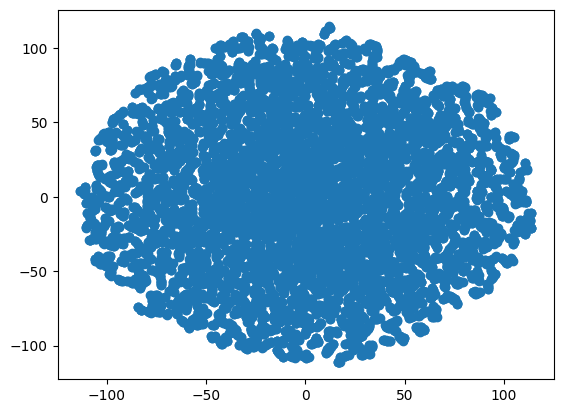

In [ ]:
tsne_bank = TSNE(n_components=2, verbose=1, perplexity=4, random_state=1)
z_bank = tsne_bank.fit_transform(x_bank)
plt.scatter(z_bank[:, 0], z_bank[:, 1])

In [ ]:
pca_bank = PCA(n_components=7)
pca_bank.fit(x_bank)
trnsf_bank = pca_bank.transform(x_bank)
explained_variance_ratio_bank = pca_bank.explained_variance_ratio_

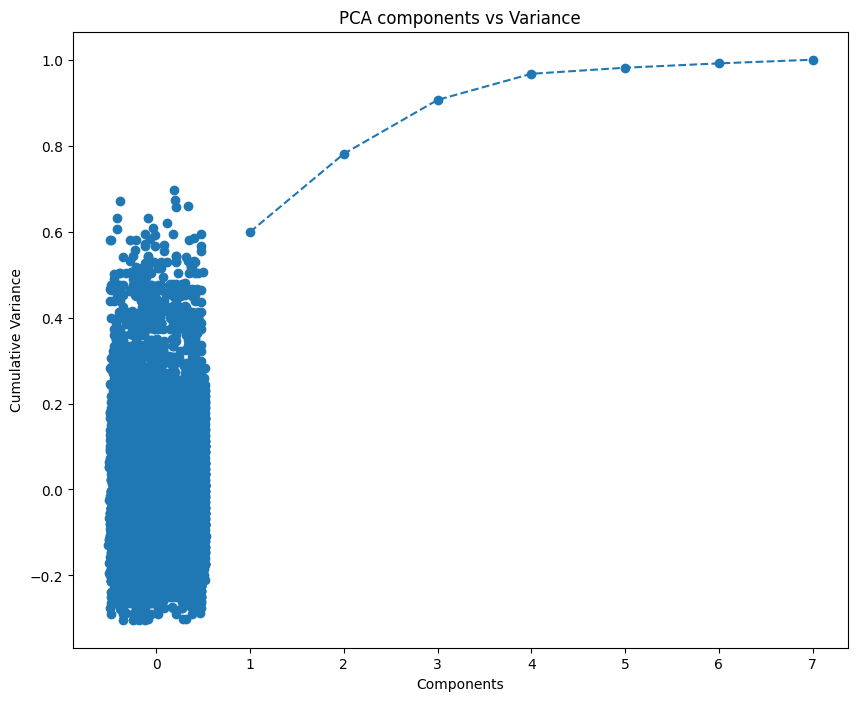

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, 8), explained_variance_ratio_bank.cumsum(), marker='o', linestyle='--')
plt.title('PCA components vs Variance')
plt.xlabel('Components')
plt.ylabel('Cumulative Variance')
plt.scatter(trnsf_bank[:, 0], trnsf_bank[:, 1])

plt.show()

# **Regression**

In [ ]:
regression_model = LinearRegression()
regression_model.fit(X_train_preprocessed, y_train)

LinearRegression()

In [ ]:
y_pred_regression = regression_model.predict(X_test_preprocessed)
mae_regression = mean_absolute_error(y_test, y_pred_regression)
print("Mean Absolute Error of Linear Regression Model:", mae_regression)

Mean Absolute Error of Linear Regression Model: 0.3175278333500795


In [ ]:
svr_model = SVR()
svr_model.fit(X_train_preprocessed, y_train)

SVR()

In [ ]:
y_pred_svr = svr_model.predict(X_test_preprocessed)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
print("Mean Absolute Error of SVR Model:", mae_svr)

Mean Absolute Error of SVR Model: 0.23939562969828165


In [ ]:
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train_preprocessed, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_random_forest = random_forest_model.predict(X_test_preprocessed)
mae_random_forest = mean_absolute_error(y_test, y_pred_random_forest)
print("Mean Absolute Error of Random Forest Regression Model:", mae_random_forest)

Mean Absolute Error of Random Forest Regression Model: 0.22516345723242273


# **Best Results Table**

In [ ]:
results_list = []

for model_name, model in models.items():
    y_pred = model.predict(X_test_preprocessed)

    if isinstance(model, RandomForestClassifier):  # Check if the model is a classification model
        accuracy = accuracy_score(y_test, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

        results_list.append(pd.DataFrame({'Model': [model_name], 'Metric': ['Accuracy'], 'Value': [accuracy]}))
        results_list.append(pd.DataFrame({'Model': [model_name], 'Metric': ['Precision'], 'Value': [precision]}))
        results_list.append(pd.DataFrame({'Model': [model_name], 'Metric': ['Recall'], 'Value': [recall]}))
        results_list.append(pd.DataFrame({'Model': [model_name], 'Metric': ['F1 Score'], 'Value': [f1]}))

for model_name, model in models.items():
    y_pred = model.predict(X_test_preprocessed)

    if isinstance(model, LinearRegression):  # Check if the model is a regression model
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results_list.append(pd.DataFrame({'Model': [model_name], 'Metric': ['MAE'], 'Value': [mae]}))
        results_list.append(pd.DataFrame({'Model': [model_name], 'Metric': ['MSE'], 'Value': [mse]}))
        results_list.append(pd.DataFrame({'Model': [model_name], 'Metric': ['R-squared'], 'Value': [r2]}))

results = pd.concat(results_list, ignore_index=True)

print("\nResults Table:\n", results)


Results Table:
               Model     Metric     Value
0      RandomForest   Accuracy  0.841469
1      RandomForest  Precision  0.814097
2      RandomForest     Recall  0.865979
3      RandomForest   F1 Score  0.839237
4  LinearRegression        MAE  0.317528
5  LinearRegression        MSE  0.146808
6  LinearRegression  R-squared  0.411612


# **Regularisation - Lasso + Ridge**

In [ ]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_preprocessed, y_train)

Lasso(alpha=0.1)

In [ ]:
y_pred_lasso = lasso_model.predict(X_test_preprocessed)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
print("Mean Absolute Error of Lasso Regression Model:", mae_lasso)

Mean Absolute Error of Lasso Regression Model: 0.443430546385654


In [ ]:
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_preprocessed, y_train)

Ridge(alpha=0.1)

In [ ]:
y_pred_ridge = ridge_model.predict(X_test_preprocessed)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
print("Mean Absolute Error of Ridge Regression Model:", mae_ridge)

Mean Absolute Error of Ridge Regression Model: 0.31752900496636344


# **Multidimensional Plotting**

In [ ]:
fig = px.scatter_3d(data, x='age', y='balance', z='duration', color='deposit',
                    symbol='loan', size='campaign',
                    labels={'deposit': 'Deposit', 'loan': 'Loan'},
                    opacity=0.7)

fig.update_layout(scene=dict(xaxis_title='Age', yaxis_title='Balance', zaxis_title='Duration'))
fig.show()

# **Dimensionality Reduction**

In [ ]:
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X_train_preprocessed)
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_train_preprocessed)